## Practical Statistics for Data Scientists
Data: kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo

In [33]:
import pandas as pd
import numpy as np

In [34]:
medal_count = pd.read_excel('Medals.xlsx')
medal_count

C:\Users\ardaz\anaconda3\envs\TokyOlimpicsDataset\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


# Estimates of Location

In [35]:
# Mean

medal_count['Total'].mean()

11.612903225806452

In [36]:
# Weighted Mean
np.average(medal_count['Total'], weights=medal_count['Gold'])

46.832352941176474

In [37]:
# Trimmed Mean

from scipy.stats import trim_mean
trim_mean(medal_count['Total'], 0.1)

6.8933333333333335

In [38]:
# Median

medal_count['Total'].median()

4.0

In [39]:
# Weighted Median: not available in pandas or NumPy

In [40]:
# Percentile: Veri dizilerinin yüzdelik dilimlerini hesaplamak için kullanılır.

q3 = np.percentile(medal_count['Total'], 75)
q3

11.0

In [41]:
# Robust Statistics: Aykırı değerlerden etkilenmeyen istatistiklerdir. Aykırı değerlerin etkisini azaltmak için kullanılır. Trimmed Mean ile yakından ilişkilidir.

In [42]:
medal_count.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


In [43]:
# Estimates of Variability (Değişkenlik Tahminleri)

# Standard Deviation (Standart Sapma): Veri setindeki değerlerin ne kadar değişken olduğunu gösterir. Aykırı değerlerden etkilenir.

# Range: Veri setindeki en büyük ve en küçük değer arasındaki farktır. Aykırı değerlerden etkilenir.

from statistics import variance, stdev
variance_total = variance(medal_count['Total'])
variance_gold = variance(medal_count['Gold'])
print(variance_total, variance_gold)

stdev_total = stdev(medal_count['Total'])
stdev_gold = stdev(medal_count['Gold'])
print(stdev_total, stdev_gold)

364.4789621318373 49.315100514259
19.091332120411014 7.022471111671375


In [44]:
# Mean Absolute Deviation (MAD): Standart sapmadan farklı olarak aykırı değerlerden etkilenmez.

from numpy import mean, absolute
mad_total = mean(absolute(medal_count['Total'] - mean(medal_count['Total'])))
mad_gold = mean(absolute(medal_count['Gold'] - mean(medal_count['Gold'])))

print(mad_total, mad_gold)

11.602497398543179 4.0048560527228565


In [45]:
# Median Absolute Deviation (MAD): Standart sapmadan farklı olarak aykırı değerlerden etkilenmez.

from numpy import median
mad_total = median(absolute(medal_count['Total'] - median(medal_count['Total'])))
mad_gold = median(absolute(medal_count['Gold'] - median(medal_count['Gold'])))

print(mad_total, mad_gold)

3.0 1.0


# Exploring the Data Distribution

In [46]:
# Box Plots

pd.Series.quantile(medal_count['Total'], [0, 0.25, 0.5, 0.75, 1])

0.00      1.0
0.25      2.0
0.50      4.0
0.75     11.0
1.00    113.0
Name: Total, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1ee35982450>,
 'caps': [<matplotlib.lines.Line2D at 0x1ee326f42d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ee35a62e90>],
 'medians': [<matplotlib.lines.Line2D at 0x1ee3093e3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ee359909d0>],
 'means': []}

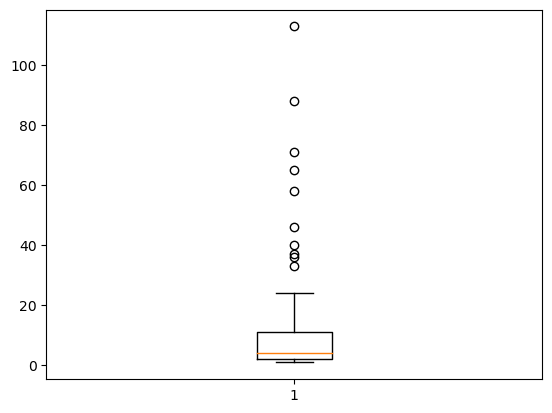

In [47]:
import matplotlib.pyplot as plt
plt.boxplot(medal_count['Total'])

(array([68., 10.,  5.,  3.,  2.,  1.,  1.,  1.,  1.]),
 array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 <BarContainer object of 9 artists>)

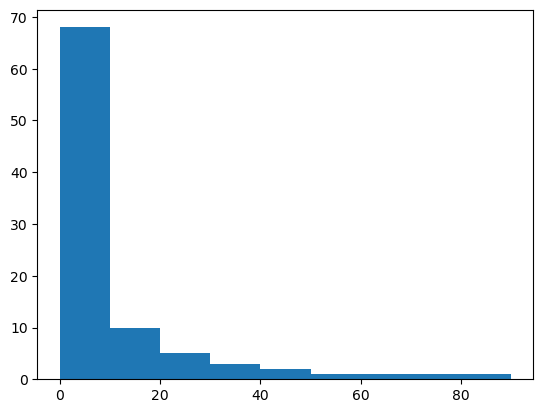

In [48]:
# Histograms

plt.hist(medal_count['Total'], bins=range(0, 100, 10))


In [49]:
# Frequency Tables

frequency_table = medal_count.copy()
frequency_table['Total'] = pd.cut(medal_count['Total'], bins=range(0, 100, 10))
frequency_table = frequency_table.groupby('Total').size().reset_index(name='Freq')
print(frequency_table)

      Total  Freq
0   (0, 10]    69
1  (10, 20]    12
2  (20, 30]     2
3  (30, 40]     4
4  (40, 50]     1
5  (50, 60]     1
6  (60, 70]     1
7  (70, 80]     1
8  (80, 90]     1


<Axes: ylabel='Density'>

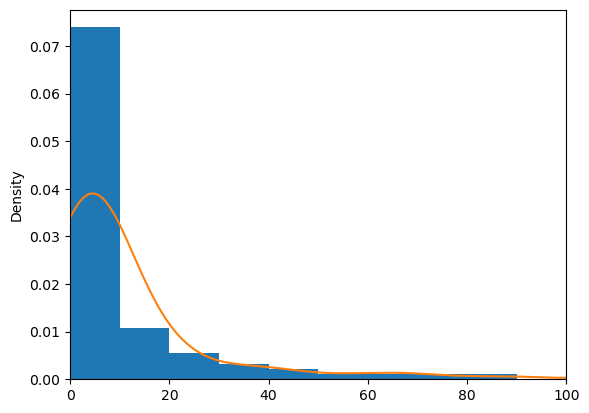

In [50]:
# Density Plots

medal_count['Total'].plot.hist(density=True, xlim=[0, 100], bins=range(0, 100, 10))
medal_count['Total'].plot.density(xlim=[0, 100])

# Correlation

<Axes: xlabel='Gold', ylabel='Total'>

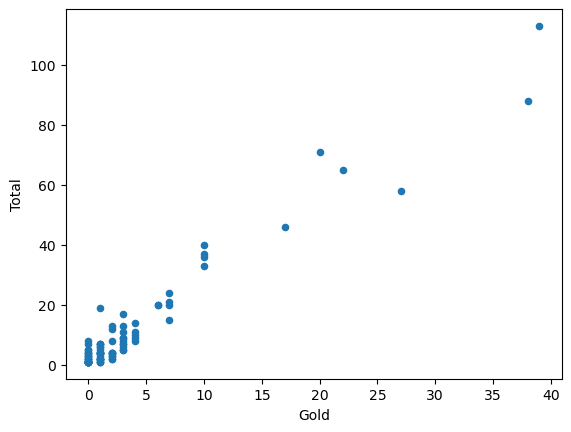

In [53]:
medal_count.plot.scatter(x='Gold', y='Total')